## Potrzebne importy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import danych i zmiany

In [2]:
from ucimlrepo import fetch_ucirepo   
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets 

In [3]:
df = pd.concat([X,y], axis = 1)

In [4]:
zmiana = {"a": "1", "b": 2, "c": 3, "d": 4, "e": 5, "f": 6, "g": 7, "h": 8}

df["white-king-file"] = df["white-king-file"].map(zmiana)
df["white-rook-file"] = df["white-rook-file"].map(zmiana)
df["black-king-file"] = df["black-king-file"].map(zmiana)


In [5]:
df['white-king-file'] = df['white-king-file'].astype(int)
df['white-rook-file'] = df['white-rook-file'].astype(int)
df['black-king-file'] = df['black-king-file'].astype(int)

## Zadanie 1

In [6]:
df1 = df[df["white-depth-of-win"] == "draw"]
df1 = df1.groupby(["black-king-rank", "black-king-file"]).size().unstack(fill_value = 0)
df1.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

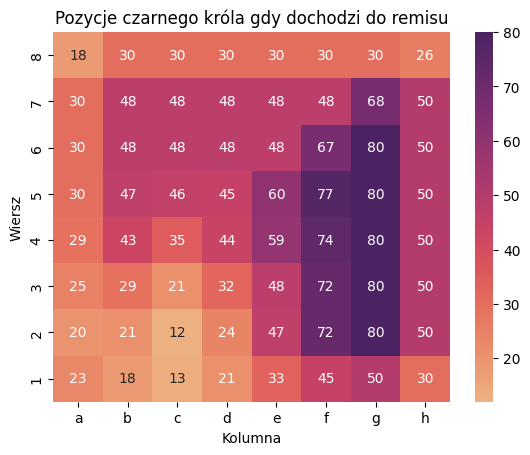

In [24]:
ax = sns.heatmap(df1, annot = True, cmap = "flare")
ax.invert_yaxis()
plt.title("Pozycje czarnego króla gdy dochodzi do remisu")
plt.xlabel("Kolumna")
plt.ylabel("Wiersz")
plt.show()

Gdy dochodzi do remisu, król najczęściej znajduje się w kolumnie g lub f, najczęściej w ich środku.

In [ ]:
df2 = df[df["white-depth-of-win"] == "zero"]
df2 = df2.groupby(["black-king-rank", "black-king-file"]).size().unstack(fill_value=0)
df2.columns = df2.columns.astype(int)
df2 = df2.reindex(index=range(1,9), columns=range(1,9), fill_value=0)
df2 = df2.sort_index(ascending=False)
df2.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

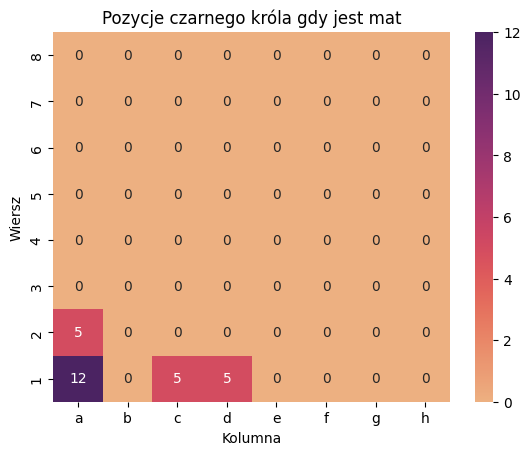

In [23]:
ax = sns.heatmap(df2, annot = True, cmap = "flare")
plt.title("Pozycje czarnego króla gdy jest mat")
plt.xlabel("Kolumna")
plt.ylabel("Wiersz")
plt.show()

Nie mamy zbyt wielu danych dla sytuacji mata. Z tych co się wydarzyły, to najwięcej z nich miało miejsce na polu 1a.

# Zadanie 2

In [11]:
euklides = np.sqrt((df["white-king-file"]-df["black-king-file"])**2+(df["white-king-rank"]-df["black-king-rank"])**2)
manhattan = abs(df["white-king-file"]-df["black-king-file"])+ abs(df["white-king-rank"]-df["black-king-rank"])
czebyszew = np.maximum(abs(df["white-king-file"]-df["black-king-file"]), abs(df["white-king-rank"]-df["black-king-rank"]))


In [12]:
zmiana2 = {'draw' : -1, 'eight': 8, 'eleven': 11, 'fifteen':15, 'five':5, 'four':4, 'fourteen':14,
       'nine':9, 'one':1, 'seven':7, 'six':6, 'sixteen':16, 'ten':10, 'thirteen':13,
       'three':3, 'twelve':12, 'two':2, 'zero':0}
df["white-depth-of-win"] = df["white-depth-of-win"].map(zmiana2).astype(int)

In [13]:
df["euklides"] = euklides
df["manhattan"] = manhattan
df["czebyszew"] = czebyszew

In [14]:
df3 = df[df["white-depth-of-win"] != -1]


In [15]:
df3["diffe"] = abs(df3["white-depth-of-win"] - df3["euklides"])
df3["diffm"] = abs(df3["white-depth-of-win"] - df3["manhattan"])
df3["diffc"] = abs(df3["white-depth-of-win"] - df3["czebyszew"])

C:\Users\Fabufil\AppData\Local\Temp\ipykernel_44448\451891732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["diffe"] = abs(df3["white-depth-of-win"] - df3["euklides"])
C:\Users\Fabufil\AppData\Local\Temp\ipykernel_44448\451891732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["diffm"] = abs(df3["white-depth-of-win"] - df3["manhattan"])
C:\Users\Fabufil\AppData\Local\Temp\ipykernel_44448\451891732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

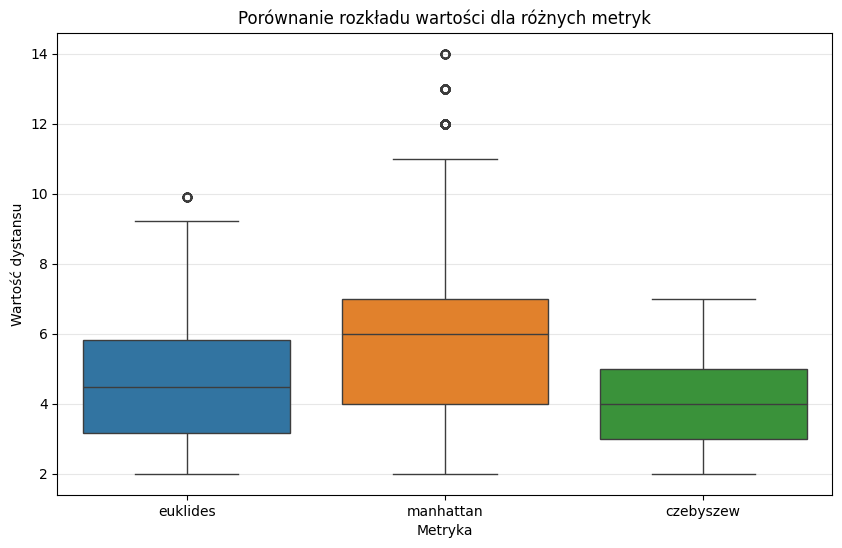

In [25]:
plt.figure(figsize=(10, 6))

metryki = df3[["euklides", "manhattan", "czebyszew"]]

sns.boxplot(data=metryki)

plt.title("Porównanie rozkładu wartości dla różnych metryk")
plt.ylabel("Wartość dystansu")
plt.xlabel("Metryka")
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Najlepsza do przewidywania liczby ruchów do wygranej jest metryka Czebyszewa, ale euklidesowa działa niewiele gorzej.

## Zadanie 3

In [17]:
odleglosc_czrnego_krola_od_krawedzi_szachownicy = np.minimum(np.minimum(abs((8-df["black-king-rank"])), abs((8-df["black-king-file"]))), np.minimum(abs((1-df["black-king-rank"])), abs((1-df["black-king-file"]))))
df["odleglosc"] = odleglosc_czrnego_krola_od_krawedzi_szachownicy

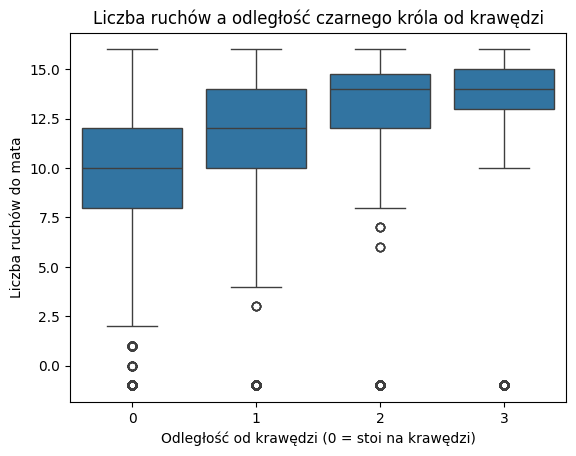

In [26]:
plt.figure()
sns.boxplot(data=df, x="odleglosc", y="white-depth-of-win")
plt.title("Liczba ruchów a odległość czarnego króla od krawędzi")
plt.xlabel("Odległość od krawędzi (0 = stoi na krawędzi)")
plt.ylabel("Liczba ruchów do mata")
plt.show()

Średnio najmniej ruchów do mata jest im mniejsza odległość od krawędzi tablicy, jednak w każdej sytuacji może się okazać, że będzie 16 ruchów.

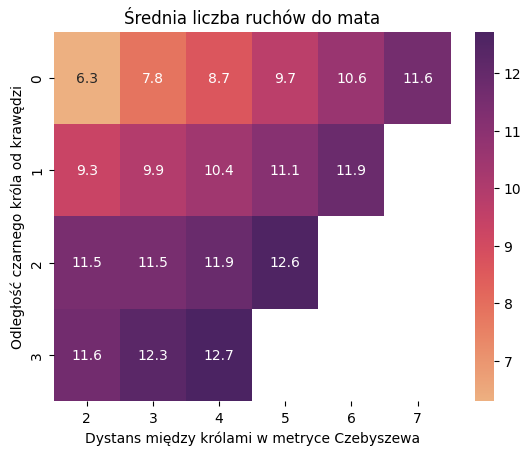

In [28]:
pivot_table = df.pivot_table(
    index="odleglosc", 
    columns="czebyszew", 
    values="white-depth-of-win", 
    aggfunc="mean"
)


sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="flare")

plt.title("Średnia liczba ruchów do mata")
plt.ylabel("Odległość czarnego króla od krawędzi")
plt.xlabel("Dystans między królami w metryce Czebyszewa")
plt.show()

Najmniej ruchów do mata jest gdy oba dystanse są najmniejsze, a gdy się zwiększają to i średnie liczby ruchów się zwiększają.